In [1]:
from collections import deque
import os
import matplotlib.pyplot as plt
import time
import numpy as np

In [2]:
os.chdir('/home/emy/master_courses/formal methods/Newyork_dataset/algorithms')

In [3]:
os.listdir()

['USA-road-d.NY.co', 'algorithms.py', 'USA-road-d.NY.gr']

## 1. define BFS

In [4]:
def bfs(graph, vertex):
    queue = deque([vertex])
    level = {vertex: 0}
    parent = {vertex: None}
    while queue:
        v = queue.popleft()
        for n in graph[v]:
            if n not in level:            
                queue.append(n)
                level[n] = level[v] + 1
                parent[n] = v
    return level, parent

## 2. Read graph

In [43]:

with open('USA-road-d.NY.co') as f:
    c_lines = f.readlines()

with open('USA-road-d.NY.gr') as f:
    g_lines = f.readlines()

n = int(g_lines[4].split()[2])  # Number of nodes in the graph
m = int(g_lines[4].split()[3])  # Number of edges

print('The graph has', n, 'nodes and', m, 'edges.')

#read coordinates:
coordinates = [0] * (n+9)
for line in c_lines:
    if line[0] == 'v':
        u, x, y = map(int, line.split()[1:])
        coordinates[u] = [x, y]

# Parse the graph:
g = []
for i in range(n+9):
    g.append([])


# for line in g_lines:
#     if line[0] == 'a':
#         u, v, w = map(int, line.split()[1:])
#         g[u].append(v)
    
    
for line in g_lines:
    if line[0] == 'a':
        u, v, w = map(int, line.split()[1:])
        if (u < 512) and (v < 512):
            g[u].append(v)

The graph has 264346 nodes and 733846 edges.


In [44]:
len(g)

264355

## 3. Run algorithm

In [ ]:
alg= bfs(g, 1)

In [ ]:
bfs(g, 1)

## 4.  time complexity

In [6]:
#one source, multiple destinations
qun_time=[]
start = time.time()
bfs(g, 1)
qun_time. append(time.time() - start)

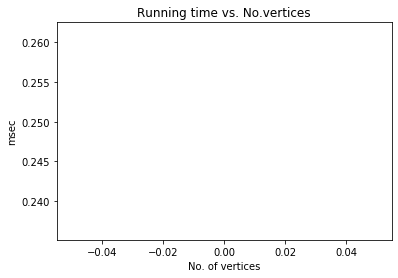

In [7]:
plt.figure()
plt.plot(qun_time)
plt.title("Running time vs. No.vertices")
plt.xlabel("No. of vertices")
plt.ylabel("msec")
plt.show()

In [10]:
#multiple sources, multiple destinations
#batches: [64,128, 256,512, 1024,2048, 4096 ]

qun_time=[]
for n in range(1,65):
    start = time.time()
    bfs(g, n)
    qun_time. append(time.time() - start)

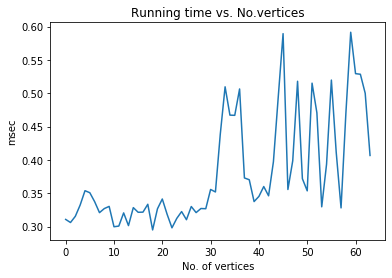

In [11]:
plt.figure()
plt.plot(qun_time)
plt.title("Running time vs. No.vertices")
plt.xlabel("No. of vertices")
plt.ylabel("msec")
plt.show()

In [13]:
#multiple sources, multiple destinations

time1=[]
for n in range(1,129):
    start = time.time()
    bfs(g, n)
    time1. append(time.time() - start)

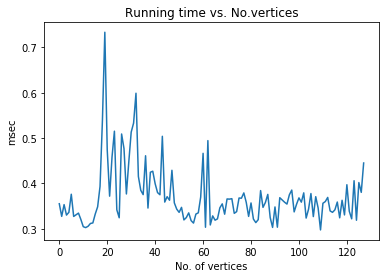

In [14]:
plt.figure()
plt.plot(time1)
plt.title("Running time vs. No.vertices")
plt.xlabel("No. of vertices")
plt.ylabel("msec")
plt.show()

In [18]:
#multiple sources, multiple nodes

time2=[]
for n in range(1,16385):
    start = time.time()
    bfs(g, n)
    time2. append(time.time() - start)

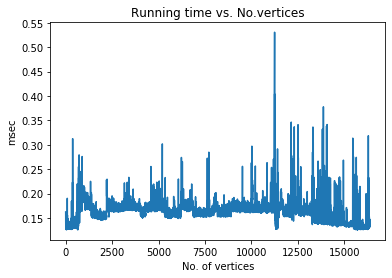

In [19]:
plt.figure()
plt.plot(time2)
plt.title("Running time vs. No.vertices")
plt.xlabel("No. of vertices")
plt.ylabel("msec")
plt.show()

In [20]:
#multiple sources, multiple nodes

time3=[]
for n in range(1,264347):
    start = time.time()
    bfs(g, n)
    time3. append(time.time() - start)

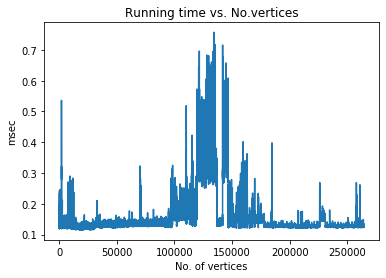

In [32]:
plt.figure()
plt.plot(np.arange(1, 264347), time3)
plt.title("Running time vs. No.vertices")
plt.xlabel("No. of vertices")
plt.ylabel("msec")
plt.savefig("Running time vs. No.vertices.pdf")
plt.show()

In [45]:
#single sources, multiple nodes
time3=[]
for counter in range(0,3):
    n = np.random.randint(1, 513)
    start = time.time()
    bfs(g, n)
    time3.append(time.time() - start)

In [48]:
ave_time= np.array(time3).mean()
ave_time

0.0011615753173828125

## Resources

- https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python